<a href="https://colab.research.google.com/github/venki03/employees/blob/master/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 


In [1]:
pip install tensorflow

In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [12]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [39]:
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

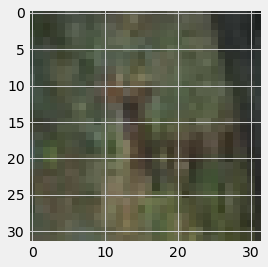

In [40]:
img = plt.imshow(x_train[index])

In [20]:
print('lable for ',y_train[index])

lable for  [[6]]


In [0]:
classification = ['airplane', 'automobile', 'brid', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



TypeError: ignored

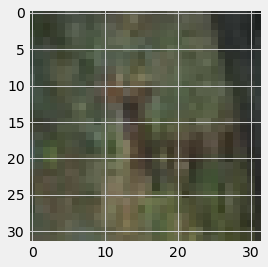

In [44]:
img = plt.imshow(x_train[index])
classification[y_train][0]

In [49]:
classification[y_train[index][0]]

'deer'

In [0]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [0]:
x_train = x_train/255
x_test = x_test/255

In [0]:
model = Sequential()

model.add( Conv2D(32, (5,5), activation='relu', input_shape=(32,32,3)) )

model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(32, (5,5),activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1000, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))



In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics= ['accuracy'])

In [72]:
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs= 10,
                 validation_split = 0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.7846 - accuracy: 0.3313 - val_loss: 1.4778 - val_accuracy: 0.4653
Epoch 2/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.4317 - accuracy: 0.4787 - val_loss: 1.3299 - val_accuracy: 0.5236
Epoch 3/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.2892 - accuracy: 0.5364 - val_loss: 1.1782 - val_accuracy: 0.5776
Epoch 4/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.1763 - accuracy: 0.5791 - val_loss: 1.1129 - val_accuracy: 0.6096
Epoch 5/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.0868 - accuracy: 0.6161 - val_loss: 1.1095 - val_accuracy: 0.6174
Epoch 6/10
40000/40000 [==============================] - 55s 1ms/step - loss: 1.0078 - accuracy: 0.6420 - val_loss: 1.0229 - val_accuracy: 0.6464
Epoch 7/10
40000/40000 [==============================] - 55s 1ms/st

In [73]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 5s 481us/step


0.680400013923645